In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

In [3]:
def mark_ambig(st_type):
    data = pd.read_csv('pred_result/NS_BH_'+st_type+'.csv')
    data_new = data.copy()
    temp_val = []
    pred_code = []
    prob =  data_new['prob'].to_numpy()
    code = data_new['is_ok'].to_numpy()
    cl = data_new['pred_class'].to_numpy()
    for i in range(len(data)):
        if(prob[i]<0.8):
            temp_val.append('X')
            pred_code.append(2)
        else:
            temp_val.append(cl[i])
            pred_code.append(code[i])
    data_new.insert(5 , 'th_class' , temp_val)
    data_new.insert(6 , 'pred_code' , pred_code)
    #display(data_new)
    data_new.to_csv('pred_result/ambig/NS_BH_'+st_type+'.csv')

[13, 204, 15]


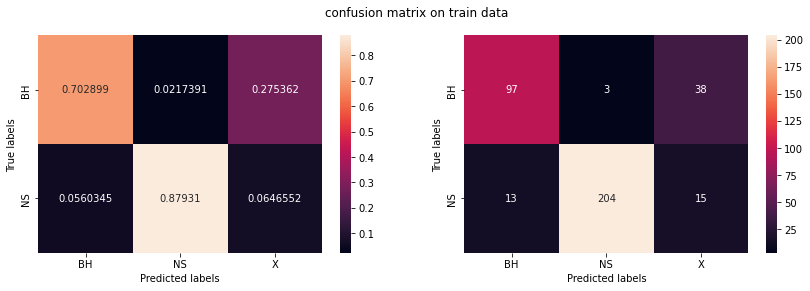

In [5]:
st_type = 'train'
mark_ambig(st_type)
cf = []
def creat_cf_row(clr , clw):
    temp_row = []
    data = pd.read_csv('pred_result/ambig/NS_BH_'+st_type+'.csv')
    data_clr = data[data['class']==clr] # data_class_right
    clr = len(data_clr[data_clr['th_class']== clr ])
    clw = len(data_clr[data_clr['th_class']== clw ])
    clx = len(data_clr[data_clr['th_class']== 'X' ])
    temp_row = [clr , clw , clx]
    return temp_row

cf.append(creat_cf_row('BH', 'NS'))
row2= creat_cf_row('NS', 'BH')
row2_a = row2[:2][::-1]
row2_b =  row2[-1]
row2_a.append(row2_b)
print(row2_a)
cf.append(row2_a)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(14,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels([ 'BH' , 'NS' ,'X']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on train data')
plt.savefig('pred_result/plots/cf_ns_bh_train.jpg')
plt.show()
plt.close()

In [6]:
st_type = 'train'
data = pd.read_csv('pred_result/ambig/NS_BH_'+st_type+'.csv')
sources = np.unique(data['src_id'])
src_name = []
src_id = []
src_class = []
src_corr = []
src_incorr = []
src_ambig = []
src_good = []
for s in sources:
    #print(s)
    temp = data[data['src_id']==s]
    #display(temp)
    src_corr.append(len(temp[temp['pred_code']==1]))
    
    inc = len(temp[temp['pred_code']==0])
    src_incorr.append(inc)
    ambig = len(temp[temp['pred_code']==2])
    src_ambig.append(ambig)
    if((ambig+inc)==0):
        src_good.append('ok')
    else:
        src_good.append('chk')
    src_name.append(temp['src_name'].iloc[0])
    src_class.append(temp['class'].iloc[0])
    src_id.append(temp['src_id'].iloc[0])

src_info = pd.DataFrame()
src_info.insert(0,'id' , src_id)
src_info.insert(1 , 'name' , src_name)
src_info.insert(2 , 'class' , src_class)
src_info.insert(3 , 'correct' , src_corr)
src_info.insert(4 , 'incorr' , src_incorr)
src_info.insert(5 , 'ambig' , src_ambig)
src_info.insert(6 , 'train_q' , src_good)
display(src_info)
src_info.to_csv('pred_result/NS_BH_'+st_type+'_qualify.csv')


,id,name,class,correct,incorr,ambig,train_q
0,BH0001,1A 0620-00,BH,0,0,3,chk
1,BH0004,GRO J1655-40,BH,1,0,1,chk
2,BH0009,SAX J1819.3-2525,BH,3,0,2,chk
3,BH0010,XTE J1550-564,BH,4,1,2,chk
4,BH0011,XTE J1650-500,BH,0,1,0,chk
5,BH0014,CXOU J100506.7-07443,BH,5,0,1,chk
6,BH0018,CXOU J100514.2-07423,BH,10,0,0,ok
7,BH0019,CXOU J100515.4-07425,BH,11,0,0,ok
8,BH0020,CXOU J100516.2-07423,BH,1,0,10,chk
9,BH0021,CXOU J100516.5-07420,BH,11,0,0,ok


[1, 22, 0]


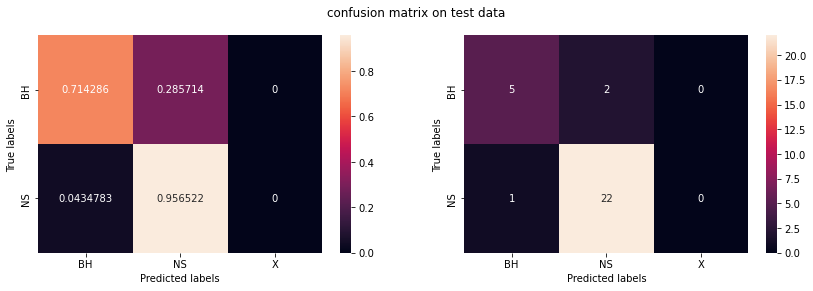

In [7]:
st_type = 'test'
mark_ambig('test')
cf = []
def creat_cf_row(clr , clw):
    temp_row = []
    data = pd.read_csv('pred_result/ambig/NS_BH_'+st_type+'.csv')
    data_clr = data[data['class']==clr] # data_class_right
    clr = len(data_clr[data_clr['th_class']== clr ])
    clw = len(data_clr[data_clr['th_class']== clw ])
    clx = len(data_clr[data_clr['th_class']== 'X' ])
    temp_row = [clr , clw , clx]
    return temp_row

cf.append(creat_cf_row('BH', 'NS'))
row2= creat_cf_row('NS', 'BH')
row2_a = row2[:2][::-1]
row2_b =  row2[-1]
row2_a.append(row2_b)
print(row2_a)
cf.append(row2_a)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(14,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels([ 'BH' , 'NS' ,'X']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on '+st_type+' data')
plt.savefig('pred_result/plots/cf_ns_bh_'+st_type+'.jpg')
plt.show()
plt.close()

In [8]:
st_type = 'test'
data = pd.read_csv('pred_result/ambig/NS_BH_'+st_type+'.csv')
sources = np.unique(data['src_id'])
src_name = []
src_id = []
src_class = []
src_corr = []
src_incorr = []
src_ambig = []
src_good = []
for s in sources:
    #print(s)
    temp = data[data['src_id']==s]
    #display(temp)
    src_corr.append(len(temp[temp['pred_code']==1]))
    
    inc = len(temp[temp['pred_code']==0])
    src_incorr.append(inc)
    ambig = len(temp[temp['pred_code']==2])
    src_ambig.append(ambig)
    if((ambig+inc)==0):
        src_good.append('ok')
    else:
        src_good.append('chk')
    src_name.append(temp['src_name'].iloc[0])
    src_class.append(temp['class'].iloc[0])
    src_id.append(temp['src_id'].iloc[0])

src_info = pd.DataFrame()
src_info.insert(0,'id' , src_id)
src_info.insert(1 , 'name' , src_name)
src_info.insert(2 , 'class' , src_class)
src_info.insert(3 , 'correct' , src_corr)
src_info.insert(4 , 'incorr' , src_incorr)
src_info.insert(5 , 'ambig' , src_ambig)
src_info.insert(6 , 'train_q' , src_good)
display(src_info)
src_info.to_csv('pred_result/NS_BH_'+st_type+'_qualify.csv')


,id,name,class,correct,incorr,ambig,train_q
0,BH0003,GINGA 1354-645,BH,1,2,0,chk
1,BH0008,IGR J17464-3213,BH,3,0,0,ok
2,BH0016,CXOU J100510.0-07452,BH,1,0,0,ok
3,NS0003,1A 1743-288,NS,0,1,0,chk
4,NS0016,CEN X-4,NS,2,0,0,ok
5,NS0055,J1748-2021#1,NS,4,0,0,ok
6,NS0072,SAXWFC J1748.1-2446.,NS,16,0,0,ok
